#Обучение модели

##Импорт и предобработка

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
import ipywidgets as widgets
from IPython.display import display

In [23]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/realty_data.csv')
data.head()

,product_name,period,price,postcode,address_name,lat,lon,object_type,total_square,rooms,floor,city,settlement,district,area,description,source
0,"3-комнатная, 137 м²",NaN,63000000,127473.0,"2-й Щемиловский переулок, 5а",55.778894,37.608844,Квартира,137.0,3.0,6.0,Москва,NaN,Тверской район,NaN,Просторная квартира свободной планировки с пан...,ЦИАН
1,"Студия, 16,7 м²",NaN,3250000,108815.0,"Харлампиева, 46",55.551025,37.313054,Квартира,16.7,NaN,1.0,Москва,NaN,Филимонковское поселение,NaN,ВНИМАНИЕ! ОЧЕНЬ ПРИВЛЕКАТЕЛЬНОЕ ПРЕ...,Домклик
2,"3-комнатная, 76 м²",NaN,16004680,NaN,"ЖК Прокшино, 8 к4",55.594802,37.431264,Квартира,76.0,3.0,6.0,Москва,NaN,Сосенское поселение,NaN,"Apт.1684018. 0,01% - гибкая ипотека! Воспользу...",Яндекс.Недвижимость
3,"1-комнатная, 24 м²",NaN,7841776,NaN,"ЖК Прокшино, 6 к2",55.594332,37.428099,Квартира,24.0,1.0,10.0,Москва,NaN,Сосенское поселение,NaN,Продается однокомнатная квартира № 381 в новос...,Новострой-М
4,"3-комнатная, 126 м²",NaN,120000000,121352.0,"Давыдковская, 18",55.721097,37.464342,Квартира,126.0,3.0,16.0,Москва,NaN,Фили-Давыдково район,NaN,Шикарное предложение!\nПродаётся трёхкомнатная...,Домклик


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98822 entries, 0 to 98821
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  98822 non-null  object 
 1   period        0 non-null      float64
 2   price         98822 non-null  int64  
 3   postcode      93675 non-null  float64
 4   address_name  98821 non-null  object 
 5   lat           98822 non-null  float64
 6   lon           98822 non-null  float64
 7   object_type   98822 non-null  object 
 8   total_square  98822 non-null  float64
 9   rooms         94840 non-null  float64
 10  floor         98822 non-null  float64
 11  city          91928 non-null  object 
 12  settlement    6894 non-null   object 
 13  district      75111 non-null  object 
 14  area          19498 non-null  object 
 15  description   98573 non-null  object 
 16  source        98822 non-null  object 
dtypes: float64(7), int64(1), object(9)
memory usage: 12.8+ MB


In [25]:
data.describe()

,period,price,postcode,lat,lon,total_square,rooms,floor
count,0.0,9.882200e+04,93675.000000,98822.000000,98822.000000,98822.000000,94840.000000,98822.000000
mean,NaN,2.512122e+07,124503.585119,55.742691,37.586404,66.092176,2.197427,9.905274
std,NaN,3.607234e+07,11956.742109,0.107044,0.169843,48.816204,1.038628,8.219180
min,NaN,1.900000e+06,101000.000000,55.468426,37.136489,8.000000,1.000000,1.000000
25%,NaN,1.050000e+07,115516.000000,55.673101,37.471611,40.100000,1.000000,4.000000
50%,NaN,1.516713e+07,123154.000000,55.745474,37.569365,56.400000,2.000000,8.000000
75%,NaN,2.500000e+07,140003.000000,55.817697,37.689568,75.700000,3.000000,14.000000
max,NaN,1.155219e+09,143989.000000,56.028824,38.122467,2070.000000,15.000000,66.000000


In [29]:
df = data.drop(labels=['product_name', 'period', 'postcode', 'address_name',
                       'lat', 'lon', 'district', 'area',
                       'description', 'source', 'object_type', 'city',
                       'settlement'], axis=1)

In [30]:
df.head()

,price,total_square,rooms,floor
0,63000000,137.0,3.0,6.0
1,3250000,16.7,NaN,1.0
2,16004680,76.0,3.0,6.0
3,7841776,24.0,1.0,10.0
4,120000000,126.0,3.0,16.0


Рассмотрим подробнее оставшиеся столбцы.

{'whiskers': [<matplotlib.lines.Line2D at 0x7c1243d05180>,
 'caps': [<matplotlib.lines.Line2D at 0x7c1243d056c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c1243d04ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x7c1243d05c00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c1243d05ea0>],
 'means': []}

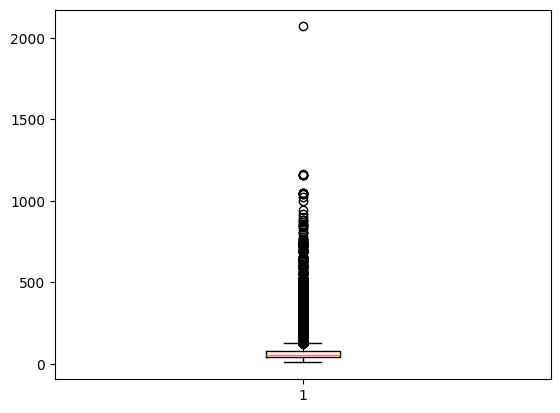

In [31]:
fig, ax = plt.subplots()
ax.boxplot(df['total_square'])

In [32]:
data.loc[data['total_square'] > 1000]

,product_name,period,price,postcode,address_name,lat,lon,object_type,total_square,rooms,floor,city,settlement,district,area,description,source
820,"6-комнатная, 1 048 м²",NaN,725635200,115184.0,"Большая Татарская, 30 ст2",55.738500,37.632231,Квартира,1048.0,6.0,2.0,Москва,NaN,Замоскворечье район,NaN,БОНУС АГЕНТУ! Жилой особняк (Дуплекс) в Замоск...,ЦИАН
10313,"10-комнатная, 1 040 м²",NaN,729612000,115184.0,"Большая Татарская, 30 ст2",55.738500,37.632231,Квартира,1040.0,10.0,1.0,Москва,NaN,Замоскворечье район,NaN,ID 12758 Предлагается особняк на Большой Татар...,Домклик
26243,"6-комнатная, 1 157 м²",NaN,362817600,121615.0,"Рублёвское шоссе, 26 к4",55.746765,37.427445,Квартира,1157.0,6.0,19.0,Москва,NaN,Кунцево район,NaN,Лот 11169 Елена Кузина\n\n ЖК ''Рублевкий''. П...,ЦИАН
28007,"6-комнатная, 1 040 м²",NaN,700000000,115184.0,"Большая Татарская, 30 ст2",55.738500,37.632231,Квартира,1040.0,6.0,1.0,Москва,NaN,Замоскворечье район,NaN,Лот: 25706. Жилой трехуровневый особняк 1040...,Домклик
35968,"Квартира, 1 022 м²",NaN,280000000,125124.0,"3-я улица Ямского Поля, 9",55.781663,37.580952,Квартира,1022.0,NaN,6.0,Москва,NaN,Беговой район,NaN,Эксклюзивный продукт! Представляем Вашему вним...,ЦИАН
36358,"6-комнатная, 2 070 м²",NaN,1067281300,119136.0,"Мосфильмовская, 70 к6",55.716151,37.508527,Квартира,2070.0,6.0,17.0,Москва,NaN,Раменки район,NaN,В самом престижном корпусе жилого комплекса ''...,ЦИАН
37009,"14-комнатная, 1 050 м²",NaN,725635200,115184.0,"Большая Татарская, 30 ст2",55.738500,37.632231,Квартира,1050.0,14.0,4.0,Москва,NaN,Замоскворечье район,NaN,Предлагается жилой особняк в историческом цен...,Домклик
42451,"6-комнатная, 1 048 м²",NaN,725635200,115184.0,"Большая Татарская, 30 ст2",55.738500,37.632231,Квартира,1048.0,6.0,1.0,Москва,NaN,Замоскворечье район,NaN,Номер объекта: G2727\nНа продажу предлагается ...,Домклик
57886,"5-комнатная, 1 157 м²",NaN,138840000,121615.0,"Рублёвское шоссе, 26 к4",55.746765,37.427445,Квартира,1157.0,5.0,22.0,Москва,NaN,Кунцево район,NaN,Продается эксклюзивный пентхаус с шикарными ви...,Домклик
66802,"7-комнатная, 1 040 м²",NaN,725635200,115184.0,"Большая Татарская, 30 ст2",55.738500,37.632231,Квартира,1040.0,7.0,1.0,Москва,NaN,Замоскворечье район,NaN,ID: 34864 Жилой особняк в центре столицы на Бо...,Домклик


Большая площадь обоснована - это особняки и пентхаусы. Большое количество комнат в таком случае также обосновано. Рассмотрим строки с отсутсвующим значением количества комнат - возможно, это все студии.

In [33]:
data.loc[data['rooms'].isna()]

,product_name,period,price,postcode,address_name,lat,lon,object_type,total_square,rooms,floor,city,settlement,district,area,description,source
1,"Студия, 16,7 м²",NaN,3250000,108815.0,"Харлампиева, 46",55.551025,37.313054,Квартира,16.70,NaN,1.0,Москва,NaN,Филимонковское поселение,NaN,ВНИМАНИЕ! ОЧЕНЬ ПРИВЛЕКАТЕЛЬНОЕ ПРЕ...,Домклик
52,"Квартира, 40,5 м²",NaN,30142700,107078.0,"проспект Академика Сахарова, 11 стр",55.771159,37.643736,Квартира,40.46,NaN,9.0,Москва,NaN,Красносельский район,NaN,"Продаются апартаменты-студия площадью 40,46 кв...",ЦИАН
101,"Студия, 39,8 м²",NaN,7000000,143402.0,"Жуковского, 11",55.815079,37.325758,Квартира,39.80,NaN,10.0,Красногорск,NaN,NaN,СГШ м-н,Арт. 28312303 Продается замечательная и просто...,Домклик
106,"Студия, 19,9 м²",NaN,5200000,143421.0,"Заповедная улица, 10",55.774497,37.235877,Квартира,19.90,NaN,5.0,NaN,пос. Ильинское-Усово,NaN,NaN,"Студия , отделка от застройщика. Заповедная до...",Домклик
128,"Студия, 19,8 м²",NaN,4700000,125476.0,"улица Василия Петушкова, 9",55.837418,37.403679,Квартира,19.80,NaN,1.0,Москва,NaN,Южное Тушино район,NaN,На Северо-западе Москвы в экологически чис...,Домклик
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98707,"Студия, 28,4 м²",NaN,5550000,108815.0,"Жемчужная, 1 к16",55.551251,37.341194,Квартира,28.40,NaN,1.0,NaN,пос. Марьино,Филимонковское поселение,NaN,МОСКОВСКАЯ ПРОПИСКА!\nПродаётся теплая квартир...,Домклик
98716,"Квартира, 78,2 м²",NaN,35000000,119192.0,"Мичуринский проспект, 56",55.695901,37.485901,Квартира,78.20,NaN,45.0,Москва,NaN,Раменки район,NaN,Продаётся квартира с потрясающими видовыми хар...,ЦИАН
98762,"Студия, 100,1 м²",NaN,77500000,125047.0,"2-я Брестская улица, 6",55.770896,37.591538,Квартира,100.10,NaN,10.0,Москва,NaN,Тверской район,NaN,Предлагается квартира студия в новом жилом ком...,Домклик
98791,"Студия, 170 м²",NaN,95000000,127051.0,"Садовая-Сухаревская улица, 10/12",55.772778,37.627077,Квартира,170.00,NaN,4.0,Москва,NaN,Мещанский район,NaN,Номер лота: 32292. Предлагается просторная дву...,Домклик


В большинстве это действительно студии. Введем значение 0 для них.

In [34]:
df['rooms'] = df['rooms'].fillna(0)

{'whiskers': [<matplotlib.lines.Line2D at 0x7c1243b76500>,
 'caps': [<matplotlib.lines.Line2D at 0x7c1243b76a40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c1243b76380>],
 'medians': [<matplotlib.lines.Line2D at 0x7c1243b76f80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c1243b77220>],
 'means': []}

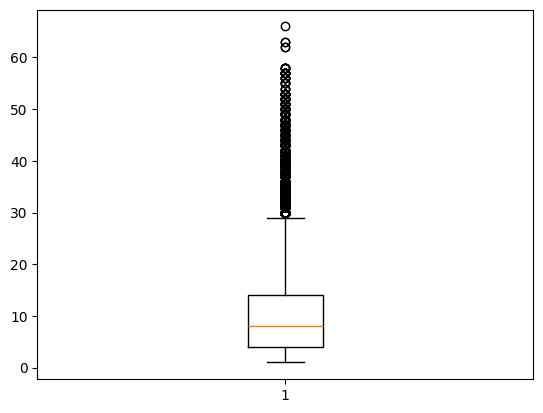

In [35]:
fig_1, ax_1 = plt.subplots()
ax_1.boxplot(df['floor'])

Dataset готов.

##Тренировка

In [36]:
x = df.drop(labels='price', axis=1)
y = df['price']

In [37]:
lr = LinearRegression()
lr.fit(x, y)

LinearRegression()

##Получение предсказания

In [48]:
def predict(model, total_square=170, rooms=2, floor=27):
  data_inp = pd.DataFrame({
      "total_square": [total_square],
      "rooms": [rooms],
      "floor": [floor],
  }
  )
  return model.predict(data_inp)

In [49]:
predict(lr)

array([99314494.16139482])

#Визуализация

##Форма

In [47]:
# @title Inference form {display-mode: "form"}

button = widgets.Button(description="Predict price")
output = widgets.Output()
total_square = 170  # @param {type: "integer"}
rooms = 2  # @param {type: "slider", min: 0, max: 15}
floor = 27  # @param {type: "slider", min: 1, max: 66}

model = lr
def on_button_clicked(b):

  data_inp = pd.DataFrame({
      "total_square": [total_square],
      "rooms": [rooms],
      "floor": [floor],
  }
  )
  preds = model.predict(data_inp)[0]
  preds = int(preds)
  with output:
     print(f"The price is: {preds} rubles.")

button.on_click(on_button_clicked)
display(button, output)

Button(description='Predict price', style=ButtonStyle())

Output()

Кнопка работает только после обновления ячейки. Можно ли реализовать постоянное ее обновление, чтобы при вводе новых данных в форму и нажатии на кнопу стоимость обновлялась?